In [119]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east ...etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

In [76]:
house_data =  pd.read_csv("data/Melbourne_housing_FULL.csv")

In [77]:
house_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [78]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [79]:
categorical_vars = house_data.describe(include=["object"]).columns
numerical_vars = house_data.describe().columns

In [80]:
house_data.shape

(34857, 21)

In [81]:
house_data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [82]:
house_data["Date"] = pd.to_datetime(house_data["Date"], dayfirst=True)

In [83]:
var = house_data[house_data["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").std()
count = house_data[house_data["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").count()
mean = house_data[house_data["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").mean()

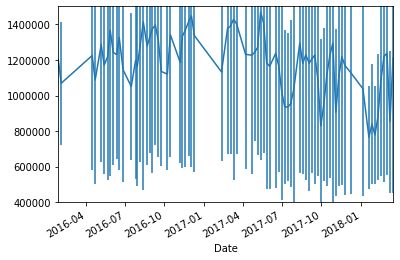

In [84]:
mean["Price"].plot(yerr=var["Price"],ylim=(400000,1500000))

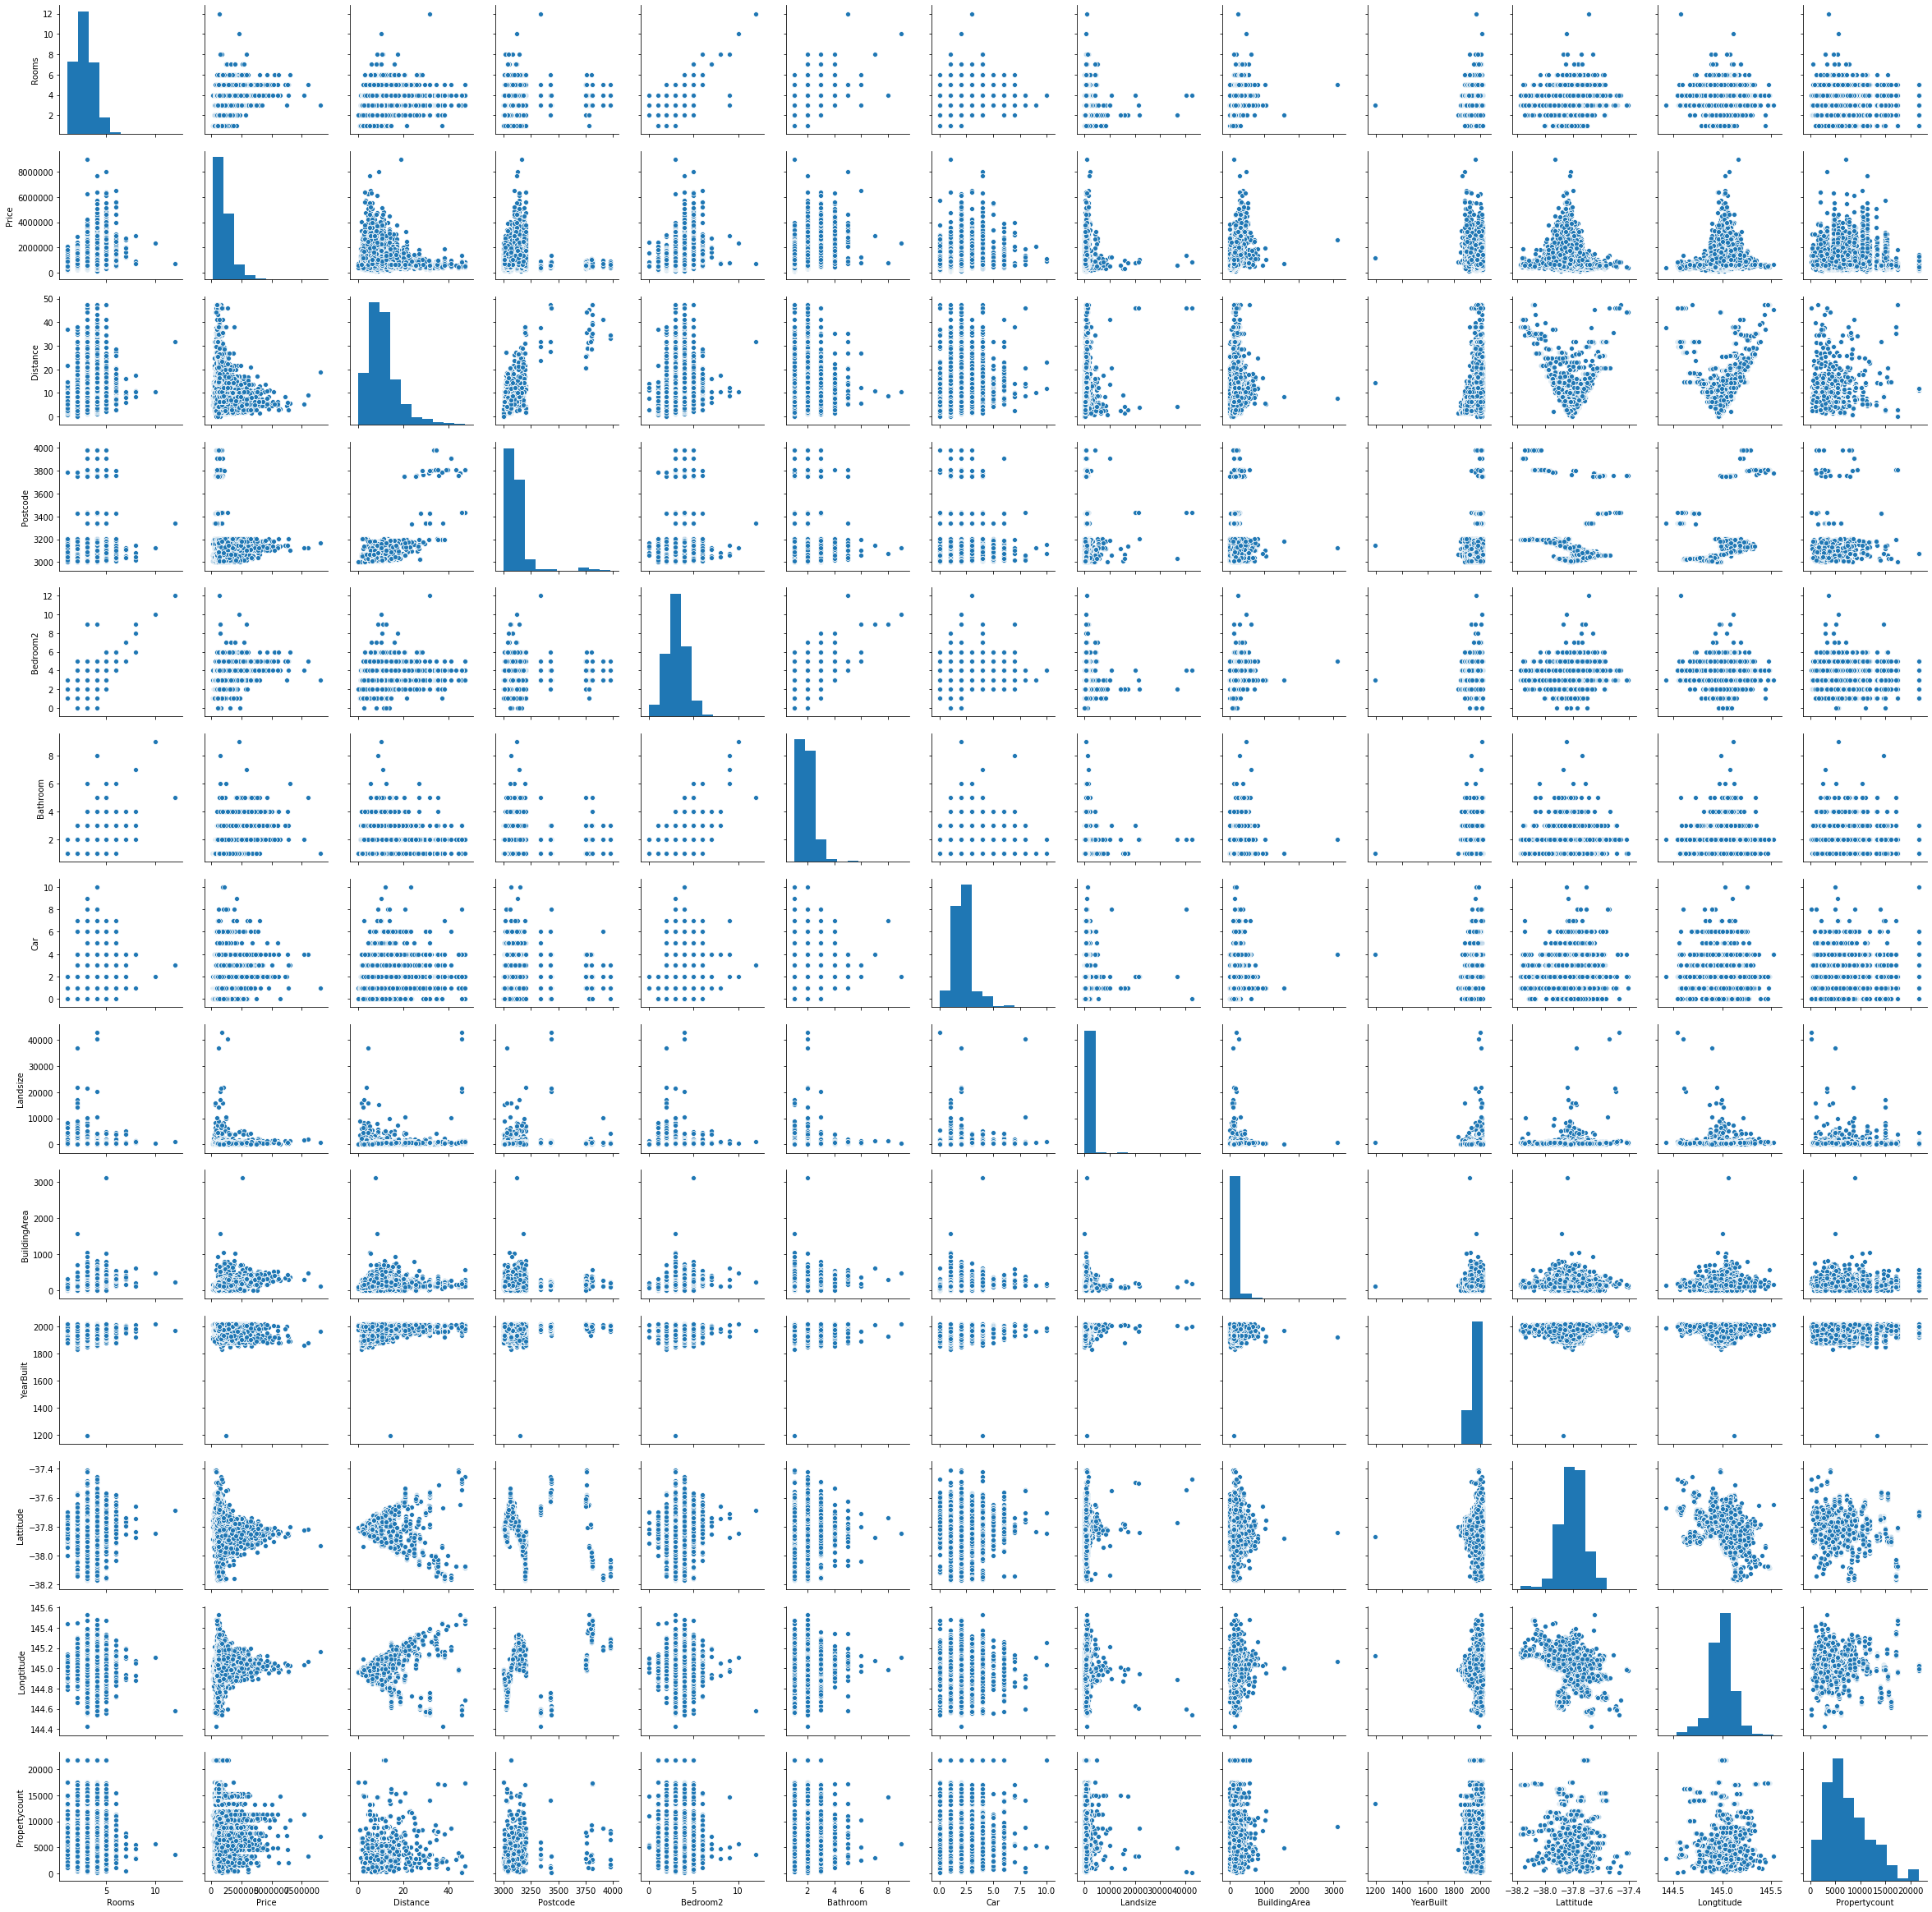

In [85]:
sns.pairplot(house_data.dropna())

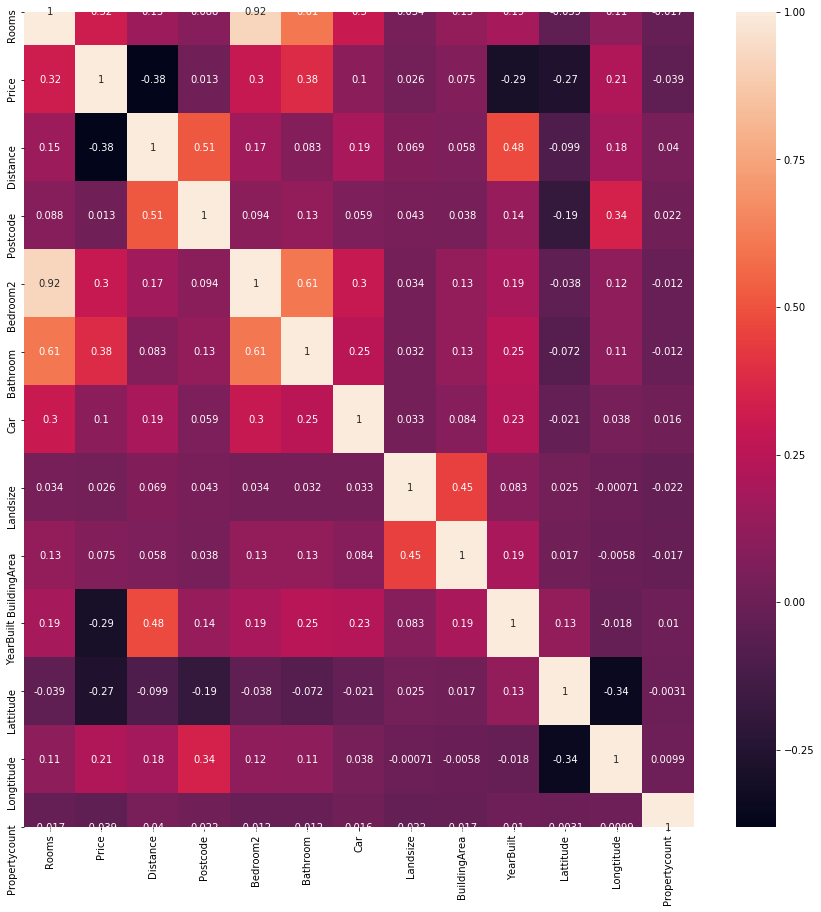

In [86]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(house_data[house_data["Type"] == "h"].corr(), annot=True)

In [87]:
cleaned = house_data.drop(['Suburb', 'Address', 'SellerG', 'CouncilArea', 'Regionname'], axis=1)

In [88]:
house_data_dr = cleaned.dropna().sort_values("Date")

In [89]:
days_since_start = [(x - house_data_dr["Date"].min()).days for x in house_data_dr["Date"]]

In [90]:
house_data_dr["Days"] = days_since_start

In [91]:
house_data_dr.head()

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Days
2,2,h,1035000.0,S,2016-02-04,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0,0
10256,2,t,805000.0,S,2016-02-04,6.5,3071.0,2.0,1.0,2.0,164.0,95.0,2009.0,-37.7536,144.9825,8870.0,0
11836,2,h,765000.0,SA,2016-02-04,13.9,3020.0,2.0,1.0,2.0,672.0,111.0,1958.0,-37.7812,144.8121,2185.0,0
6526,3,t,560000.0,VB,2016-02-04,8.7,3032.0,3.0,2.0,2.0,77.0,115.0,2004.0,-37.7746,144.8798,4918.0,0
4385,1,u,216000.0,S,2016-02-04,6.4,3011.0,1.0,1.0,1.0,0.0,50.0,1970.0,-37.7907,144.8924,7570.0,0


In [93]:
cleaned = house_data_dr.drop('Date', axis=1)

In [94]:
cleaned_dummies = pd.get_dummies(cleaned)

In [96]:
cleaned_dummies.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Propertycount,Days,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,...,4019.0,0,1,0,0,0,1,0,0,0
10256,2,805000.0,6.5,3071.0,2.0,1.0,2.0,164.0,95.0,2009.0,...,8870.0,0,0,1,0,0,1,0,0,0
11836,2,765000.0,13.9,3020.0,2.0,1.0,2.0,672.0,111.0,1958.0,...,2185.0,0,1,0,0,0,0,1,0,0
6526,3,560000.0,8.7,3032.0,3.0,2.0,2.0,77.0,115.0,2004.0,...,4918.0,0,0,1,0,0,0,0,0,1
4385,1,216000.0,6.4,3011.0,1.0,1.0,1.0,0.0,50.0,1970.0,...,7570.0,0,0,0,1,0,1,0,0,0


In [98]:
x = cleaned_dummies.drop('Price', axis=1)
y = cleaned_dummies['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [100]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
coeff = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient']).sort_values("Coefficient", ascending = False)

coeff

,Coefficient
Longtitude,6.171519e+05
Bathroom,1.928435e+05
Type_h,1.519653e+05
Rooms,1.112114e+05
Car,5.308714e+04
Method_S,4.132315e+04
Method_VB,4.100515e+04
Bedroom2,2.203358e+04
Method_PI,8.290934e+03
Type_t,5.580386e+03


In [105]:
predictions = lr.predict(x_test)

Text(0, 0.5, 'Predicted')

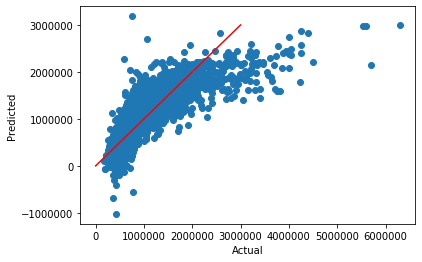

In [121]:
plt.scatter(y_test, predictions)
plt.plot([0, 3000000], [0, 3000000], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [120]:
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 263020.38922200847
MSE: 158856890735.4769
RMSE: 398568.55211553874
